In [1]:
%matplotlib inline
import deepdish as dd
import h5py
import numpy as np
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt


/home/aemerick/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/sit

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [4]:
#run     = 'NSNS1'
#run     = 'HNE1'
#run     = 'AGB1'
run     = 'AGB1'

run2    = 'SNE1'

infile = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/' + run + '_gas_abundances.h5'

h5data    = h5py.File(infile,'r')
zbins     = dd.io.load(infile,'/DD0500/CNM/mass_fraction/bins')
data_list = np.sort([x for x in h5data.keys() if 'DD' in x])


infile2 = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run2 + '/' + run2 + '_gas_abundances.h5'
h5data2    = h5py.File(infile2,'r')
data_list2 = np.sort([x for x in h5data2.keys() if 'DD' in x])


In [8]:
run_names = ['AGB1','NSNS1','SNE1','HNE1']

h5data_dict    = {}
data_list_dict = {}
infile_dict    = {}

for run in run_names:
    infile_dict[run] = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/' + run + '_gas_abundances.h5'
    h5data_dict[run] = h5py.File(infile_dict[run],'r')
    data_list_dict[run] = np.sort([x for x in h5data_dict[run].keys() if 'DD' in x])
    
abundances_to_average = {}
abundances_to_average['AGB1']  = ['C','N','O','Na','Mg','Si','S','Ca','Mn','Fe','Ni','As','Sr','Y','Ba','La','Ce','Pr','Nd']
abundances_to_average['NSNS1'] = ['Na','Si','S','Ca','Mn','Ni','As']
abundances_to_average['SNE1']  = ['Na','Si','S','Ca','Mn','Ni','As']
abundances_to_average['HNE1']  = ['Na']

In [28]:
h5data['DD0672'].keys()

[u'CNM',
 u'Disk',
 u'HIM',
 u'Molecular',
 u'WIM',
 u'WNM',
 u'general',
 u'halo',
 u'star_forming']

In [23]:
def _old_get_mass_fraction(zdex=None, mf = None, data_names = data_list, fname = infile,
                           SN_element = 'O', AGB_element = 'Ba', bins = zbins,
                           norm_stat = 'median'):
    
    result = {'AGB' : np.zeros(np.size(data_names)),
              'SN'  : np.zeros(np.size(data_names)),
              'time' : np.zeros(np.size(data_names))}
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        SN  = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + SN_element + '_Fraction')
        AGB = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + AGB_element + '_Fraction')
        
        # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
        if (norm_stat is None) or (norm_stat == ""):
            SN_norm  = np.zeros(np.size(log_z))
            AGB_norm = np.zeros(np.size(log_z))
        else:
            SN_norm   = np.log10(SN[norm_stat])
            AGB_norm  = np.log10(AGB[norm_stat])
        
        # find the 1 dex limit
        if (not (zdex is None)):
            result['SN'][i]= 1.0 - np.interp(zdex, log_z - SN_norm, np.cumsum(SN['hist']))
            result['AGB'][i]= 1.0 - np.interp(zdex, log_z - AGB_norm, np.cumsum(AGB['hist']))
            
        else:
            result['SN'][i]  = np.interp(1.0-mf, np.cumsum( SN['hist']), log_z -  SN_norm)
            result['AGB'][i] = np.interp(1.0-mf, np.cumsum(AGB['hist']), log_z - AGB_norm)
            
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)
        
    result['time'] = result['time'] - result['time'][0]
    
    return result


def get_mass_fraction(zdex=None, mf = None, data_names = data_list, fname = infile,
                          bins = zbins, elements = None,
                          norm_stat = 'median', phase = 'CNM'):
    
    
    if elements is None:
        
        elements = dd.io.load(fname, '/metal_species')
        
    elif isinstance(elements, basestring):
        elements = [elements]
    
    result = {}
    for e in elements:
        result[e] = np.zeros(np.size(data_names))
        
    result['time'] = np.zeros(np.size(data_names))
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        for e in elements:
            mass_data  = dd.io.load(fname, '/' + dname + '/' + phase + '/mass_fraction/' + e + '_Fraction')
        
            # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
            if (norm_stat is None) or (norm_stat == ""):
                norm  = np.zeros(np.size(log_z))
            else:
                norm   = np.log10(mass_data[norm_stat])
        
            # find the 1 dex limit
            if (not (zdex is None)):
                result[e][i]= 1.0 - np.interp(zdex, log_z - SN_norm, np.cumsum(mass_data['hist']))
            
            else:
                result[e][i]  = np.interp(1.0-mf, np.cumsum( mass_data['hist']), log_z -  norm)
            
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)
        
    result['time'] = result['time'] - result['time'][0]
    
    return result




def get_stat(statname, data_names = data_list, fname = infile,
             bins = zbins, elements = None, logval = False, average_all= False, average_type = None, phase = 'CNM'):
    
    
    if elements is None:
        
        elements = dd.io.load(fname, '/metal_species')
        
    elif isinstance(elements, basestring):
        elements = [elements]
    
    result = {}
    for e in elements:
        result[e] = np.zeros(np.size(data_names))
        
    result['time'] = np.zeros(np.size(data_names))
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        for e in elements:
            
            try:
                mass_data  = dd.io.load(fname, '/' + dname + '/' + phase + '/mass_fraction/' + e + '_Fraction')
            except:
                print "Failing for " + dname, e
                continue
        
            # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
            # find the 1 dex limit
            
            result[e][i] = mass_data[statname]
        

        
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)

    if logval:
        for e in elements:
            result[e] = np.log10(result[e])
    result['time'] = result['time'] - result['time'][0]
    
    if average_all:
        
        result['average'] = np.zeros(np.size(result['time']))
        count = 0
        for k in result.keys():
            
            if average_type is None:
                if k == 'time' or k =='average' or np.isnan(result[k][0]):
                    continue
            else:
                if not (k in abundances_to_average[average_type]):
                    continue
                
            result['average'] = result['average'] + result[k]
            count = count + 1
            
        result['average'] = result['average']/(1.0 * count)
        
    
    return result

def list_stats(data_name, fname = infile):
    
    if not (isinstance(data_name,basestring)):
        if isinstance(data_name[0],basestring):
            dname = data_name[0]
        else:
            raise ValueError
    else:
        dname = data_name
        
    return (dd.io.load(fname, '/' + str(dname) +'/CNM/mass_fraction/O_Fraction')).keys()    
    

In [51]:
SN  = dd.io.load('gas_abundances.h5', '/DD0500/CNM/mass_fraction/O_Fraction')

zval = np.log10(0.5*(zbins[1:]+zbins[:-1])) - np.log10(SN['median'])
xval = np.cumsum(SN['hist'])

print np.interp(1.0, zval, xval)

d = 'DD0640'

dd.io.load('gas_abundances.h5', '/'+d+'/general/Time')


0.994872561855


639.9999938633

In [55]:
result = old_get_mass_fraction(zdex=1.0)
result2 = old_get_mass_fraction(zdex=0.5)
result3 = old_get_mass_fraction(zdex=0.25)

[]

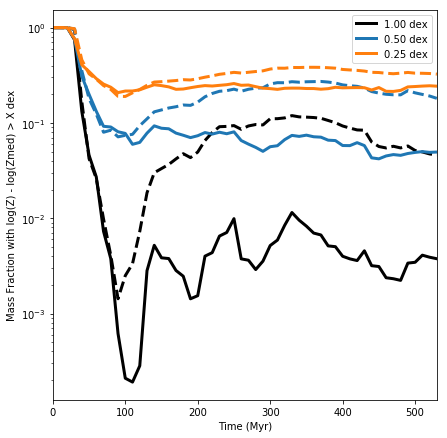

In [57]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '1.00 dex')
ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '0.50 dex')
ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '0.25 dex')
ax.plot(result3['time'], result3['AGB'], lw = 3, color = 'C1', ls = '--')

ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Mass Fraction with log(Z) - log(Zmed) > X dex')
ax.semilogy()

In [79]:
result  = get_mass_fraction(mf=0.1)
result2 = get_mass_fraction(mf=0.9)
result3  = get_mass_fraction(mf=0.25)
result4 = get_mass_fraction(mf=0.75)
result5  = get_mass_fraction(mf=0.01)
result6 = get_mass_fraction(mf=0.99)

(-1, 1)

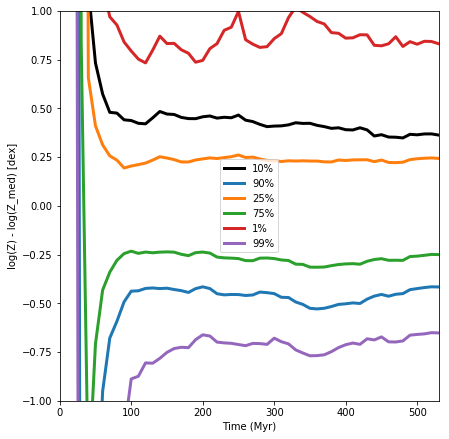

In [80]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '10%')
#ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '90%')
#ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '25%')
#ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result4['time'], result4['SN'], lw = 3, color = 'C2', label = '75%')
#ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result5['time'], result5['SN'], lw = 3, color = 'C3', label = '1%')
ax.plot(result6['time'], result6['SN'], lw = 3, color = 'C4', label = '99%')
ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('log(Z) - log(Z_med) [dex]')
ax.set_ylim(-1,1)

(-1, 1)

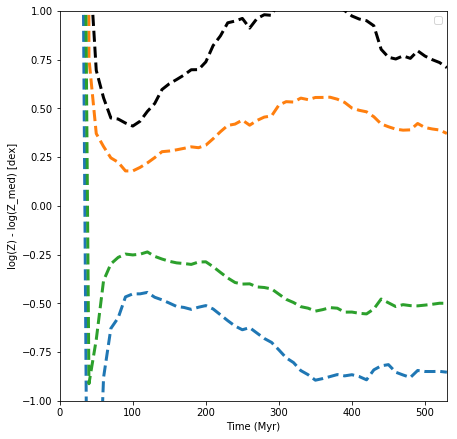

In [77]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

#ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '10%')
ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

#ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '90%')
ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

#ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '25%')
ax.plot(result3['time'], result3['AGB'], lw = 3, color = 'C1', ls = '--')

#ax.plot(result4['time'], result4['SN'], lw = 3, color = 'C2', label = '75%')
ax.plot(result4['time'], result4['AGB'], lw = 3, color = 'C2', ls = '--')
ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('log(Z) - log(Z_med) [dex]')
ax.set_ylim(-1,1)

In [18]:
list_stats(data_list)

['Q1',
 'std',
 'Q3',
 'decile_9',
 'min',
 'max',
 'decile_1',
 'hist',
 'median',
 'inner_quartile_range',
 'd9_d1_range',
 'mode',
 'variance',
 'mean']

In [70]:
median = get_stat('median', logval = True, average_all = True)


In [61]:
mean = get_stat('mean', logval = True, average_all = True)
Q1   = get_stat('Q1', logval = True, average_all = True)
Q3   = get_stat('Q3', logval = True, average_all = True)
d9   = get_stat('decile_9',logval=True,average_all=True)
d1   = get_stat('decile_1',logval=True,average_all=True)



In [24]:
all_data = {}

for run in run_names:
    all_data[run] = {}
    for stat in ['mean','median','Q1','Q3','decile_9','decile_1']:
        all_data[run][stat] = get_stat(stat, logval = True, 
                                       average_all = True, average_type = run,
                                       data_names  = data_list_dict[run], 
                                       fname = infile_dict[run], phase = 'Disk')

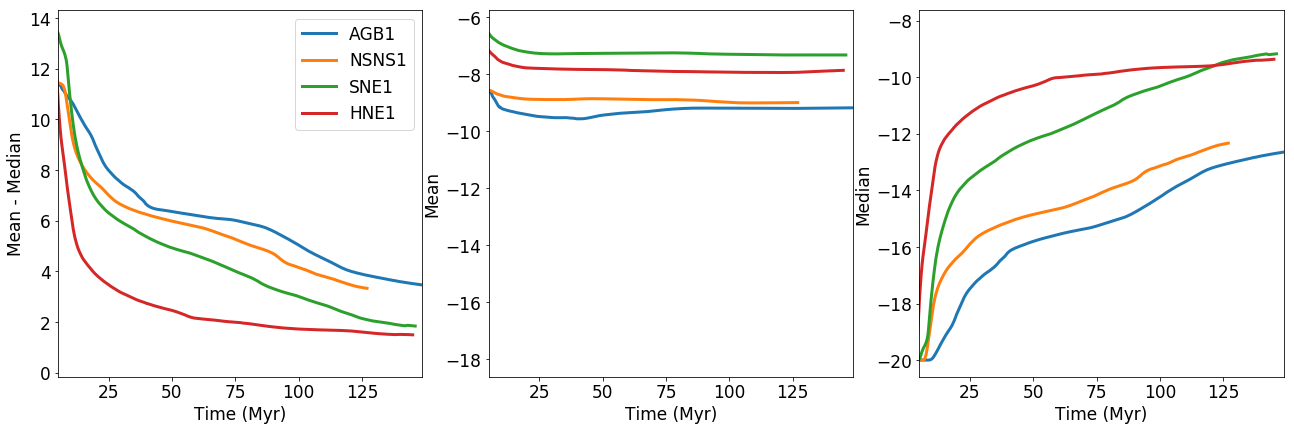

In [26]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18,6)

#
# Note mean reflects ejection fraction and initial mixing mass
#

def _get_plot_values(run, stat, species = 'average'):
    
    if stat in all_data[run].keys():
        y = all_data[run][stat][species]
    elif stat == 'mean-median':
        y = all_data[run]['mean'][species] - all_data[run]['median'][species]
    elif stat == 'IQR':
        y = all_data[run]['Q3'][species] - all_data[run]['Q1'][species]
    elif stat == 'IDR':
        y = all_data[run]['decile_9'][species] - all_data[run]['decile_1'][species]
    else:
        raise ValueError
    
    time = all_data[run]['mean']['time']
    
    return time, y

colors = {'AGB1':'C0','NSNS1':'C1','SNE1':'C2','HNE1':'C3'}

minx = 1000
maxx = -1
for run in run_names:
    x,y = _get_plot_values(run, 'mean-median', 'average')
    ax[0].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    minx = np.min( [minx,np.min(x)])
    maxx = np.max( [maxx,np.max(x)])
    
for run in run_names:
    x,y = _get_plot_values(run, 'mean', 'average')
    ax[1].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
for run in run_names:
    x,y = _get_plot_values(run, 'median', 'average')
    ax[2].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)    
    


plt.tight_layout()

for a in ax:
    a.set_xlabel(r'Time (Myr)')
    a.set_xlim(5,maxx)

ax[0].set_ylabel('Mean - Median')
ax[1].set_ylabel('Mean')
ax[2].set_ylabel('Median')
ax[0].legend(loc= 'best')


NameError: name 'mean' is not defined

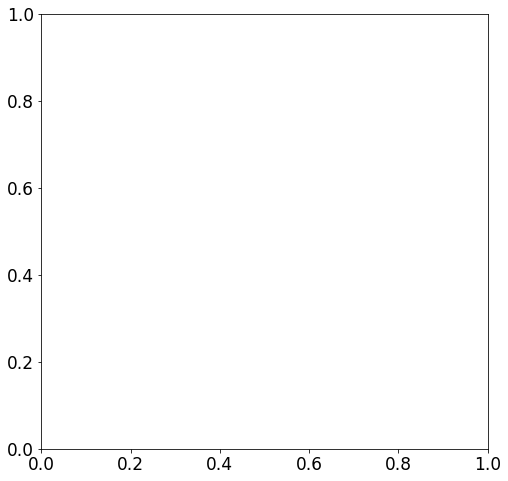

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)



ax.plot(mean['time'], Q3['average'] - Q1['average'], lw = 3, color = 'black', label = 'SNE IQR')
ax.plot(mean_2['time'], Q3_2['Na'] - Q1_2['Na'], lw = 3, color = 'black', ls = '--', label = 'HNE IQR')

ax.plot(mean['time'], d9['average'] - d1['average'], lw = 3, color = 'C1', label = 'SNE d9d1')
ax.plot(mean_2['time'], d9_2['Na'] - d1_2['Na'], lw = 3, color = 'C1', ls = '--', label = 'HNE d9d1')


ax.set_xlim(mean['time'][0], mean['time'][-1])

plt.tight_layout()

ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'Stat')


Text(25,0.5,'Stat')

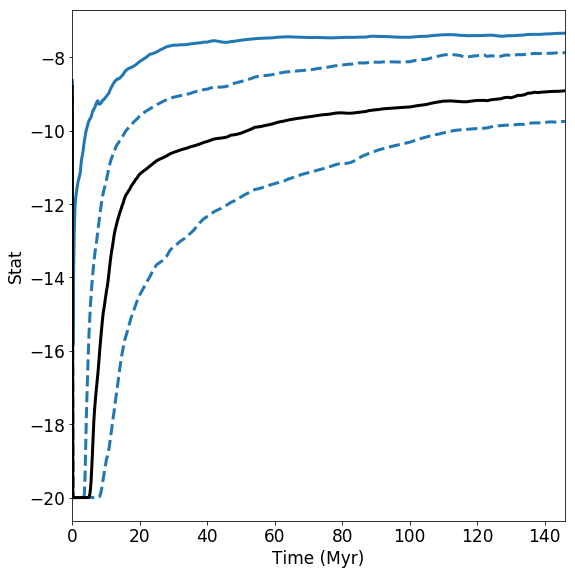

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.plot(mean['time'], Q3['Na'],  lw = 3, color = 'C0', ls = '--', label = 'SNE IQR')
ax.plot(mean['time'], Q1['Na'], lw = 3, color = 'C0', ls = '--', label = 'SNE IQR')
ax.plot(mean['time'], mean['Na'], lw = 3, color = 'C0', ls = '-', label = 'SNE IQR')
ax.plot(mean['time'], median['Na'], lw = 3, color = 'black', ls = '-', label = 'SNE IQR')



#ax.plot(mean_2['time'], Q3_2['average'],  lw = 3, color = 'C2', ls = '--', label = 'HNE IQR')
#ax.plot(mean_2['time'], Q1_2['average'], lw = 3, color = 'C2', ls = '--', label = 'HNE IQR')
#ax.plot(mean_2['time'], mean_2['average'], lw = 3, color = 'C2', ls = '-', label = 'HNE IQR')


ax.set_xlim(mean['time'][0], mean['time'][-1])

plt.tight_layout()

ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'Stat')
